In [335]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [336]:
os.chdir(r'E:\iNeuron_Course\Python_Exploratory_Projects\Flight_Price\Flight_Price')

In [337]:
df=pd.read_excel('Data_Train.xlsx')
test=pd.read_excel('Test_set.xlsx')

In [338]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [339]:
print('Train data shape: {}'.format(df.shape))
print('Test data shape: {}'.format(test.shape))

Train data shape: (10683, 11)
Test data shape: (2671, 10)


In [340]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [341]:
print(df.isnull().sum())
print(test.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [342]:
df=df.dropna()

In [444]:
test['flag']='test'
df['flag']='train'

In [579]:
data=pd.concat([df,test])

In [580]:
data.shape

(13353, 12)

In [581]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,flag
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train


In [582]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,flag
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN,test


In [583]:
data.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
flag                  0
dtype: int64

In [584]:
check=data[data['Route'].isnull()]

In [585]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,flag
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train


In [586]:
data['Dateofjourney']=pd.to_datetime(data['Date_of_Journey'])

In [587]:
data['journeyMonth']=data['Dateofjourney'].dt.month
data['journeyDate']=data['Dateofjourney'].dt.day

In [588]:
# Extracting Hours
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour

# Extracting Minutes
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute

data.drop(['Dep_Time','Date_of_Journey'], axis = 1, inplace = True)

In [589]:
##Arrival varibles
data['Arrival_hour']=pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_min']=pd.to_datetime(data['Arrival_Time']).dt.minute

data.drop(['Arrival_Time'],axis=1,inplace=True)

In [590]:
data.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                     float64
flag                       object
Dateofjourney      datetime64[ns]
journeyMonth                int64
journeyDate                 int64
Dep_hour                    int64
Dep_min                     int64
Arrival_hour                int64
Arrival_min                 int64
dtype: object

In [591]:
data[['Duration_hour','Duration_min']]=data.Duration.str.split(expand=True)

In [592]:
data['Duration_min']=np.where(data['Duration_min'].isnull(),0.0,data['Duration_min'])
data['Duration_hour']=data['Duration_hour'].str.strip('h')
data['Duration_hour']=data['Duration_hour'].str.strip('m')
data['Duration_min']=data['Duration_min'].str.strip('m')
data['Duration_min']=data['Duration_min'].str.strip('h')

data['Duration_min'].replace(np.nan, '0', inplace=True)
data['Duration_min'].unique()

data['Duration_hour']=data['Duration_hour'].str.strip().astype(int)
data['Duration_min']=data['Duration_min'].str.strip().astype(float)

del data['Duration']

In [593]:
data.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Total_Stops                object
Additional_Info            object
Price                     float64
flag                       object
Dateofjourney      datetime64[ns]
journeyMonth                int64
journeyDate                 int64
Dep_hour                    int64
Dep_min                     int64
Arrival_hour                int64
Arrival_min                 int64
Duration_hour               int32
Duration_min              float64
dtype: object

In [594]:
data['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2191
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

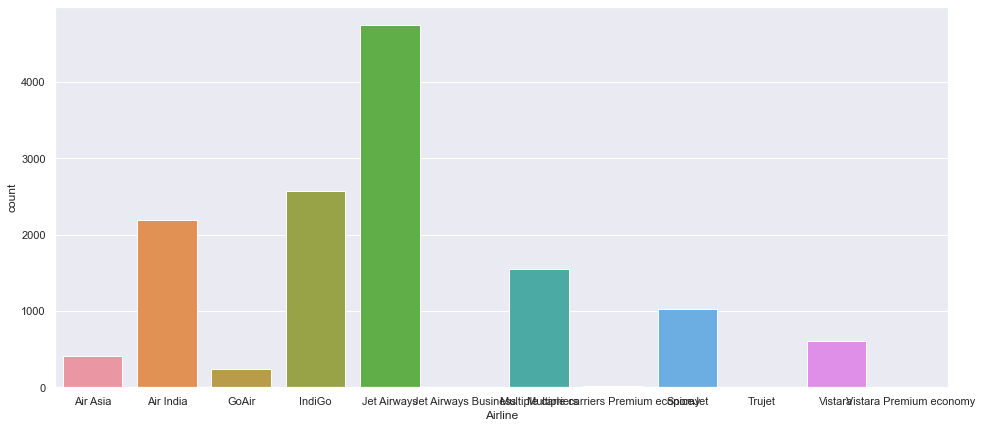

In [395]:
sns.set(rc={'figure.figsize':(16,7)})
sns.countplot(x='Airline',data= data.sort_values('Airline', ascending = True))

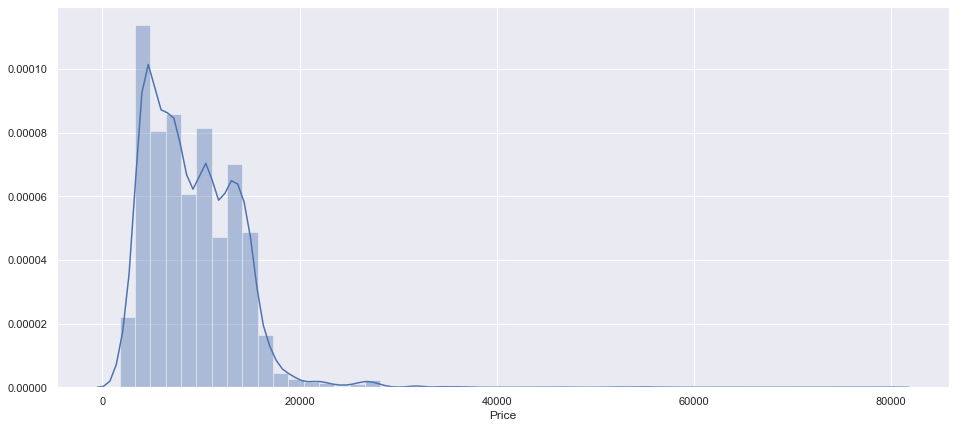

In [396]:
sns.distplot(data['Price'],kde=True)

In [539]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,flag,Dateofjourney,journeyMonth,journeyDate,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,train,2019-03-24,3,24,22,20,1,10,2,50.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,train,2019-01-05,1,5,5,50,13,15,7,25.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,train,2019-09-06,9,6,9,25,4,25,19,0.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,train,2019-12-05,12,5,18,5,23,30,5,25.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,train,2019-01-03,1,3,16,50,21,35,4,45.0


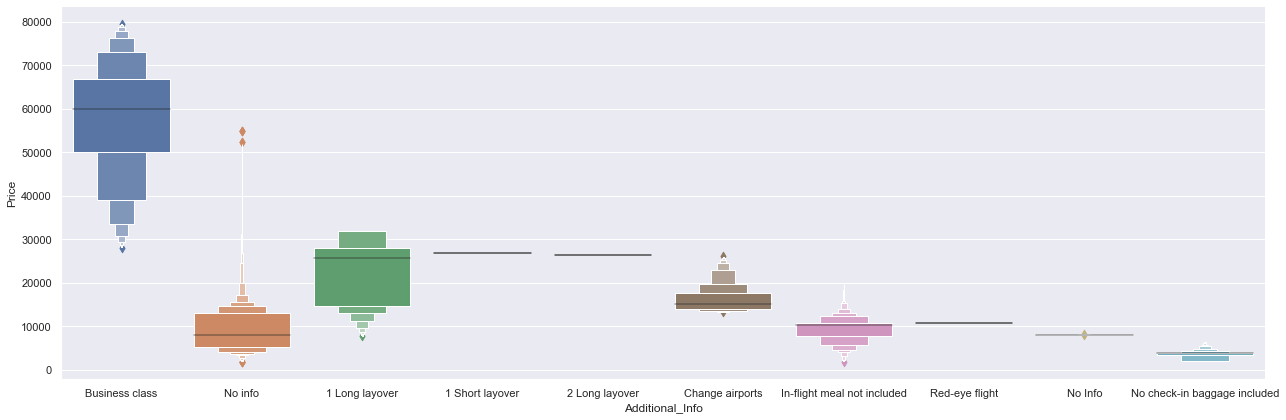

In [398]:
# Airline vs Price
sns.catplot(y = "Price", x = "Additional_Info", data = data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [595]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline = data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)

del data['Airline']
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [596]:
Source=data[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()
del data['Source']

Destination=data[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()
del data['Destination']

In [597]:
data['Additional_Info'].value_counts()

No info                         10492
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
2 Long layover                      1
1 Short layover                     1
Red-eye flight                      1
Name: Additional_Info, dtype: int64

In [598]:
# Additional_Info
data["Additional_Info"].replace({'Change airports':'Other','Business class':'Other','1 Short layover':'Other',
                                 'Red-eye flight':'Other','2 Long layover':'Other','No info':'No info','No Info':'No info'}
                                ,inplace=True)

In [599]:
# Replacing Total_Stops
data['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [603]:
data.dtypes

Route                      object
Total_Stops                 int64
Additional_Info            object
Price                     float64
flag                       object
Dateofjourney      datetime64[ns]
journeyMonth                int64
journeyDate                 int64
Dep_hour                    int64
Dep_min                     int64
Arrival_hour                int64
Arrival_min                 int64
Duration_hour               int32
Duration_min              float64
dtype: object

In [612]:
data['Additional_Info'].replace({'No info':0,'In-flight meal not included':1,'No check-in baggage included':2,
                                '1 Long layover':3,'Other':4},inplace=True)

data.head()
del data['Route']
del data['Dateofjourney']

In [613]:
[*data]

['Total_Stops',
 'Additional_Info',
 'Price',
 'flag',
 'journeyMonth',
 'journeyDate',
 'Dep_hour',
 'Dep_min',
 'Arrival_hour',
 'Arrival_min',
 'Duration_hour',
 'Duration_min']

# Join all final data 

In [614]:
final=pd.concat([data,Airline,Source,Destination],axis=1)

In [615]:
[*final]

['Total_Stops',
 'Additional_Info',
 'Price',
 'flag',
 'journeyMonth',
 'journeyDate',
 'Dep_hour',
 'Dep_min',
 'Arrival_hour',
 'Arrival_min',
 'Duration_hour',
 'Duration_min',
 'Airline_Air India',
 'Airline_GoAir',
 'Airline_IndiGo',
 'Airline_Jet Airways',
 'Airline_Jet Airways Business',
 'Airline_Multiple carriers',
 'Airline_Multiple carriers Premium economy',
 'Airline_SpiceJet',
 'Airline_Trujet',
 'Airline_Vistara',
 'Airline_Vistara Premium economy',
 'Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Destination_New Delhi']

In [616]:
data_train=final[final['flag']=='train']
data_test=final[final['flag']=='test']

del data_train['flag']
del data_test['flag']

In [617]:
print('Train data shape: {}'.format(data_train.shape))
print('Test data shape: {}'.format(data_test.shape))

Train data shape: (10682, 31)
Test data shape: (2671, 31)


In [622]:
#Correlation matrix
cor_mat=round(data_train.corr().abs(),2)
upper=cor_mat.where(np.triu(np.ones(cor_mat.shape),k=1).astype(np.bool))
high_cor=[column for column in upper.columns if any(upper[column]>0.80)]
high_cor

['Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata']

In [625]:
data_train = data_train.loc[:, ~data_train.columns.isin(high_cor)]

In [629]:
data_train.head()

,Total_Stops,Additional_Info,Price,journeyMonth,journeyDate,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,...,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Delhi,Destination_New Delhi
0,0,0,3897.0,3,24,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,0,7662.0,1,5,5,50,13,15,7,...,0,0,0,0,0,0,1,0,0,0
2,2,0,13882.0,9,6,9,25,4,25,19,...,0,0,0,0,0,1,0,0,0,0
3,1,0,6218.0,12,5,18,5,23,30,5,...,0,0,0,0,0,0,1,0,0,0
4,1,0,13302.0,1,3,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


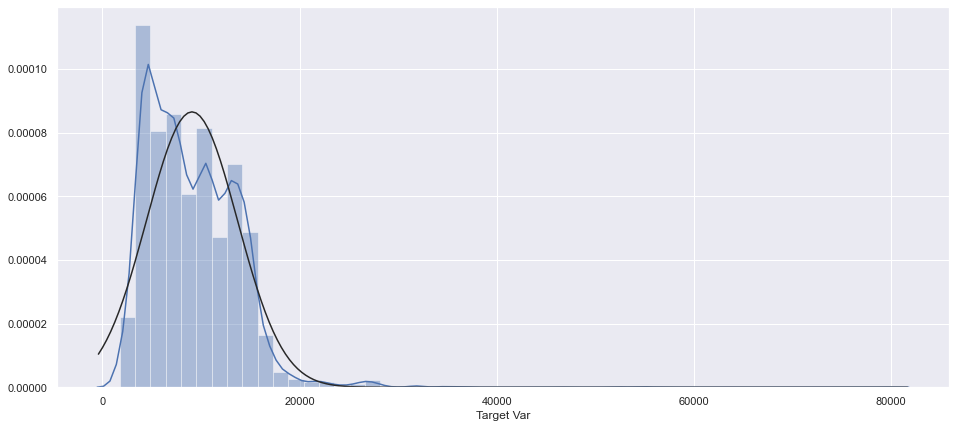

In [641]:
from scipy.stats import norm
x = pd.Series(data_train['Price'], name="Target Var")
sns.distplot(x,kde=True,rug=False,fit=norm)

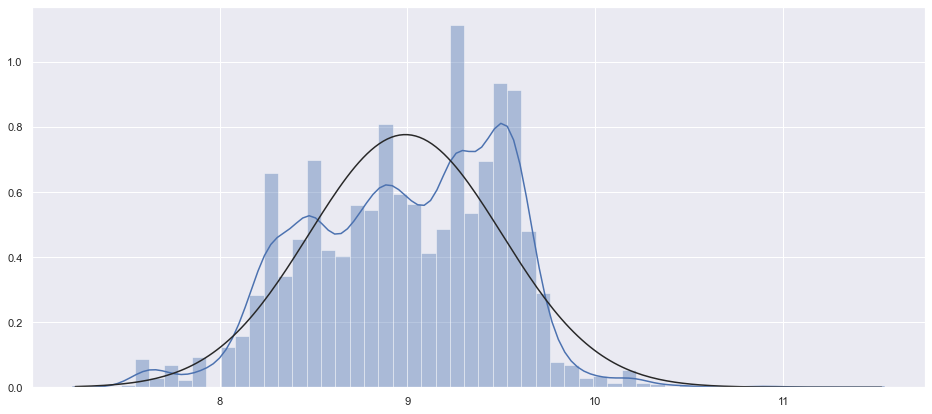

In [649]:
target_labels = data_train['Price'].values
ytrain = np.where(target_labels>0,np.log(target_labels),0)
ytrain

#x = pd.Series(data_train['Price'], name="Target Var")
sns.distplot(ytrain,kde=True,rug=False,fit=norm)

In [678]:
y = pd.DataFrame(ytrain)
ytrain

array([8.26796231, 8.94402833, 9.53834832, ..., 8.88585599, 9.44525438,
       9.37186381])

In [654]:
X=data_train.drop(['Price'],axis=1)
print('Colname X {}'.format([*X]))
#Nomalise the data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X2 = scale.fit_transform(X)
X2 = pd.DataFrame(X2)
X2.head()
X2.columns=['Total_Stops', 'Additional_Info', 'journeyMonth', 'journeyDate', 'Dep_hour', 'Dep_min', 'Arrival_hour', 
            'Arrival_min', 'Duration_hour', 'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
            'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 
            'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara',
            'Airline_Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 
            'Destination_Delhi', 'Destination_New Delhi']

Colname X ['Total_Stops', 'Additional_Info', 'journeyMonth', 'journeyDate', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour', 'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Delhi', 'Destination_New Delhi']


In [679]:
print('Shape of train data: {}'.format(X2.shape))
print('Shape of target var: {}'.format(ytrain.shape))

Shape of train data: (10682, 27)
Shape of target var: (10682,)


# Model

In [680]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X2,ytrain,random_state=42,test_size=0.2)

In [681]:
print('Shape of x_train data: {}'.format(x_train.shape))
print('Shape of x_test var: {}'.format(x_test.shape))
print('Shape of y_train data: {}'.format(y_train.shape))
print('Shape of y_test var: {}'.format(y_test.shape))

Shape of x_train data: (8545, 27)
Shape of x_test var: (2137, 27)
Shape of y_train data: (8545,)
Shape of y_test var: (2137,)


In [701]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [710]:
reg_rf = XGBRegressor()
reg_rf.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [748]:
#For Random Forest
reg_rf.best_params_

In [711]:
y_pred = reg_rf.predict(x_test)
y_pred

array([9.710567 , 8.741538 , 9.058887 , ..., 8.813983 , 9.129864 ,
       9.5646715], dtype=float32)

In [712]:
reg_rf.score(x_train, y_train)

0.9732087146372019

In [713]:
metrics.r2_score(y_test, y_pred)

0.9467288410125545

In [714]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.0803598326537854
MSE: 0.014499126166876498
RMSE: 0.12041231733870293


# Validation Data

In [725]:
data_test = data_test.loc[:, ~data_test.columns.isin(high_cor)]

In [726]:
data_test.head()

,Total_Stops,Additional_Info,journeyMonth,journeyDate,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,...,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Delhi,Destination_New Delhi
0,1,0,6,6,17,30,4,25,10,55.0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,12,5,6,20,10,20,4,0.0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,5,21,19,15,19,0,23,45.0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,5,21,8,0,21,0,13,0.0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,6,24,23,55,2,45,2,50.0,...,0,0,0,0,0,0,0,0,1,0


In [731]:
print('Colname X {}'.format([*data_test]))
test=scale.transform(data_test)
test=pd.DataFrame(test)
test.columns=['Total_Stops', 'Additional_Info', 'journeyMonth', 'journeyDate', 'Dep_hour', 'Dep_min', 'Arrival_hour',
              'Arrival_min', 'Duration_hour', 'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 
              'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 
              'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara',
              'Airline_Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
              'Destination_Delhi', 'Destination_New Delhi']

Colname X ['Total_Stops', 'Additional_Info', 'journeyMonth', 'journeyDate', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour', 'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Delhi', 'Destination_New Delhi']


In [732]:
val_pred = reg_rf.predict(test)
val_pred

array([9.525448, 8.359096, 9.454013, ..., 9.760391, 9.412353, 8.972473],
      dtype=float32)

In [733]:
output=pd.DataFrame(val_pred)

In [735]:
output.columns=['Price']

In [741]:
val_pred2         = np.exp(reg_rf.predict(test))
val_pred2
output['Price2']  = pd.DataFrame(val_pred2)

In [743]:
output['Price2']  = np.round(val_pred2*0.975)
output

,Price,Price2
0,9.525448,13361.0
1,8.359096,4162.0
2,9.454013,12440.0
3,9.242449,10068.0
4,8.229543,3656.0
...,...,...
2666,9.228286,9927.0
2667,8.491695,4752.0
2668,9.760391,16900.0
2669,9.412353,11933.0


In [744]:
Final=pd.concat([test,output],axis=1)

In [745]:
Final.shape

(2671, 29)

In [746]:
Final.head()

,Total_Stops,Additional_Info,journeyMonth,journeyDate,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Delhi,Destination_New Delhi,Price,Price2
0,0.260383,-0.486659,0.155739,-0.759131,0.784369,0.297903,-1.363054,0.018745,-0.028887,1.574074,...,-0.216673,-0.016761,-0.192319,1.164018,-0.606266,-0.264206,-0.366513,-0.309176,9.525448,13361.0
1,0.260383,-0.486659,2.164117,-0.872724,-1.129156,-0.234950,-0.488291,-0.284175,-0.735260,-1.671580,...,-0.216673,-0.016761,-0.192319,-0.859093,1.649441,-0.264206,-0.366513,-0.309176,8.359096,4162.0
2,0.260383,1.414069,-0.178990,0.944759,1.132283,-0.501376,0.823854,-1.495853,1.501589,0.983955,...,-0.216673,-0.016761,-0.192319,1.164018,-0.606266,-0.264206,-0.366513,-0.309176,9.454013,12440.0
3,0.260383,-0.486659,-0.178990,0.944759,-0.781243,-1.300655,1.115442,-1.495853,0.324300,-1.671580,...,-0.216673,-0.016761,-0.192319,1.164018,-0.606266,-0.264206,-0.366513,-0.309176,9.242449,10068.0
4,-1.220666,-0.486659,0.155739,1.285536,1.828111,1.630034,-1.654642,1.230423,-0.970718,1.279015,...,-0.216673,-0.016761,-0.192319,-0.859093,-0.606266,-0.264206,2.728419,-0.309176,8.229543,3656.0
